<a href="https://colab.research.google.com/github/kaajalguptaa/Earthquake/blob/main/BloodDonationPrediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Blood donation prediction**

by Mohammad Ovesh, Kajal kumari S, Deepak Raj

Team ID : PTID-CDS-JUL22-1335

Project ID: PCRP-1011-BloodDonaPred

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import  XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve 
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
# To ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/21Ovi/DataScience-DataSets/main/Data/Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv")


# **BASIC CHECKS**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


* From above info(), we found all the data is integer

In [ ]:
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [ ]:
data.tail()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0
575,74,72,1,250,72,0


In [ ]:
data.shape

(576, 6)

In [ ]:
data.rename(columns = {"Months since Last Donation":"Month_since_last_donation","Number of Donations":"No_of_Donations","Total Volume Donated (c.c.)":"Total_volume_donated","Months since First Donation":"Months_since_first_donation","Made Donation in March 2007":"Made_Donation_in_march_2007"},inplace=True)

## Rename unnamed column

Lets rename our **first column** "Unamed: 0", as **Donar_id**  using rename function

In [ ]:
data.rename(columns = {"Unnamed: 0":"Donar_id"},inplace=True)
data.head()

,Donar_id,Month_since_last_donation,No_of_Donations,Total_volume_donated,Months_since_first_donation,Made_Donation_in_march_2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [ ]:
data.head().T

,0,1,2,3,4
Donar_id,619,664,441,160,358
Month_since_last_donation,2,0,1,2,1
No_of_Donations,50,13,16,20,24
Total_volume_donated,12500,3250,4000,5000,6000
Months_since_first_donation,98,28,35,45,77
Made_Donation_in_march_2007,1,1,1,1,0


In [ ]:
data.describe()

,Donar_id,Month_since_last_donation,No_of_Donations,Total_volume_donated,Months_since_first_donation,Made_Donation_in_march_2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


**DESCRIBE :**

It returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

# **EXPLORATORY DATA ANALYSIS** 

## Univariate Data Analysis


 
For initial investigation on data
 
* To discover patterns 
* To plot anomalis

* To check assumptions with statistics and graphical representations


Importing sweetviz to analyze dataset

In [ ]:
#pip install sweetviz

UNIVARIATE ANALYSIS :

  *  To check features using various statistical methods and visualizations
   
   *  Missing values
   * Outliers
   * Normal distribution - skewness and kurtosis

In [ ]:
'''blood_donation_report = sv.analyze(data) #display the report
blood_donation_report.show_html('Blood_Donation_Prediction.html')'''

"blood_donation_report = sv.analyze(data) #display the report\nblood_donation_report.show_html('Blood_Donation_Prediction.html')"

**INSIGHTS FROM ABOVE UNIVARIATE ANALYSIS :**
 
   *  Maximum number of donars donated since **last month  donation is 74.**
   * Maximum number of donation made is **more than 50%**
   * maximum volume donated  is around  **250 volume** by **20.5% of donars**  
   * **Highest volume** of blood donated is around **12500 litres** by **0.2% of donars**.
   * **Mximum number** of blood donated since first donation is 7.3% by **42 donars.**
   * **Less number of donation** since first donation is **1.4%** , donated by 8 donars.
   * Out of 576 donars only 138 donations were made, which is only **24% of donation**.
   *Around **78% donars** have **not donated** the blood.


## BIVARIATE ANALYSIS

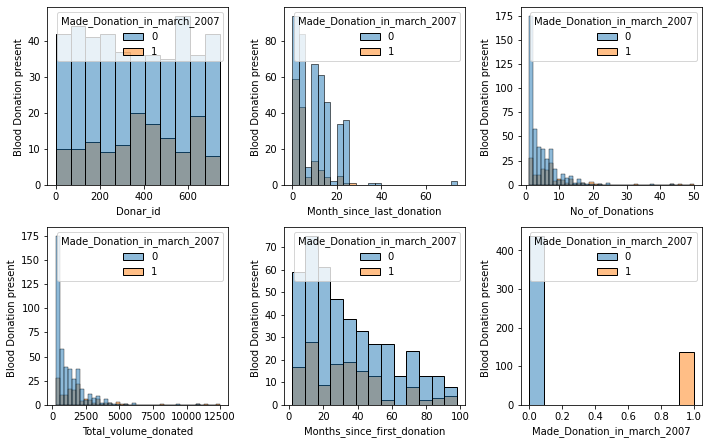

In [ ]:
plt.figure(figsize=(10,15), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 

for column in data: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=15 :     # as there are 13 columns in the data
        ax = plt.subplot(5,3,plotnumber)# plotting 40 graphs (4-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=data[column],hue=data.Made_Donation_in_march_2007) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=10) #assigning name to x-axis and "name" font size is 10
        plt.ylabel('Blood Donation present ',fontsize=10)#assigning name to y-axis and "name" font size is 10
    plotnumber+=1 # increment of plotnumber 
plt.tight_layout()#to show plot

INSIGHTS FROM ABOVE BIVARIATE ANALYSIS :

*  **Around 60** blood donations were made since the last donation month.
* Between the **month 25 to 30** only **few blood donations** were made since first donation of month. 
* **Out of 175** donations present , only around **25 donations** were made.
* **Around 5%** of blood donor Blood donated  with the **volume of 5000**.
*  **Atmost 150 donars** donated blood in **march 2007**.
* **More than 400 donars** have **not donated** blood in march 2007.
* Only **few donar**s donated blood around **12500 volume**.

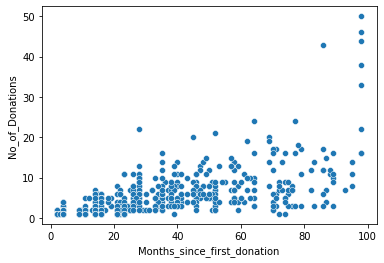

In [ ]:
sns.scatterplot(x="Months_since_first_donation",y="No_of_Donations",data=data);

*  Most of the donations are made between 20 to 50 months since the first donation.


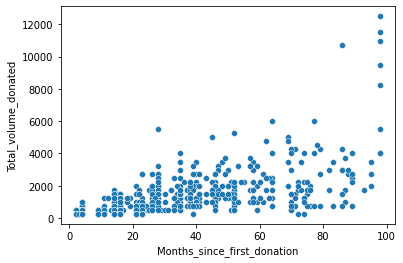

In [ ]:
sns.scatterplot(x="Months_since_first_donation",y="Total_volume_donated",data=data);

* Total number of volume donated by  donars **between 10 to 50 months** since the first donation has occured many compared to other months.
* **Most of the donars** donated blood with a volume of **2000 litre**.


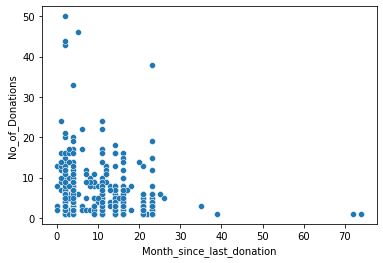

In [ ]:
sns.scatterplot(x="Month_since_last_donation",y="No_of_Donations",data=data);

* No of donations made by many donars is **around 18 donations**.
* Only **few donars** donated more than **40 donations**.

# DataPreprocessing

In [ ]:
data.duplicated().sum()

0

No **Duplicate Values**

In [ ]:
data.isnull().sum()

Donar_id                       0
Month_since_last_donation      0
No_of_Donations                0
Total_volume_donated           0
Months_since_first_donation    0
Made_Donation_in_march_2007    0
dtype: int64

**No NULL** Values

## Drop unwanted column

In [ ]:
data.drop('Donar_id',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Month_since_last_donation    576 non-null    int64
 1   No_of_Donations              576 non-null    int64
 2   Total_volume_donated         576 non-null    int64
 3   Months_since_first_donation  576 non-null    int64
 4   Made_Donation_in_march_2007  576 non-null    int64
dtypes: int64(5)
memory usage: 22.6 KB


# Modeling

## Splitting data into Training and Testing

In [ ]:
X=data.iloc[:,0:-1]  #independent variable
y=data.Made_Donation_in_march_2007

In [ ]:
X

,Month_since_last_donation,No_of_Donations,Total_volume_donated,Months_since_first_donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
571,23,1,250,23
572,16,3,750,86
573,21,2,500,52
574,39,1,250,39


In [ ]:
y

0      1
1      1
2      1
3      1
4      0
      ..
571    0
572    0
573    0
574    0
575    0
Name: Made_Donation_in_march_2007, Length: 576, dtype: int64

**X** is **independent** variable

**y** is **dependent** variable

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Spliting training and test data

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(460, 4) (460,) (116, 4) (116,)


In [ ]:
sc=SMOTE()
X_smote,Y_smote=sc.fit_resample(X_train,y_train)

Balance Data

In [ ]:
print(X_smote.shape,Y_smote.shape)

(702, 4) (702,)


## Feature Selection

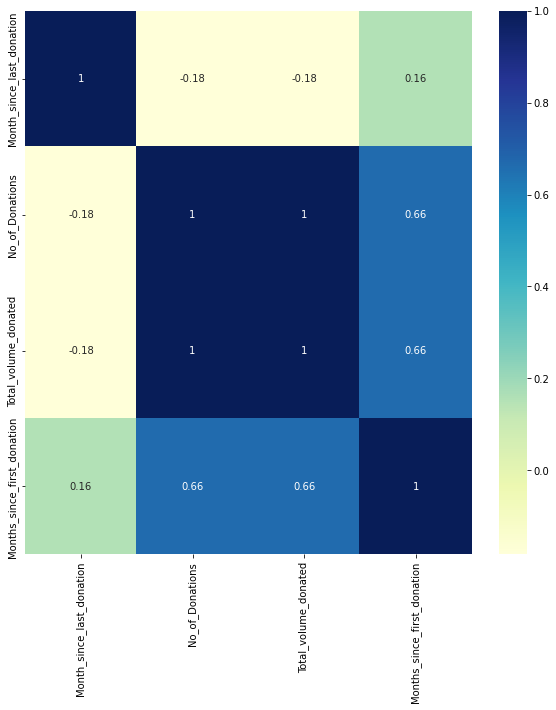

In [ ]:
plt.figure(figsize=(10,10))
cor = X_smote.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.YlGnBu)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

Set the threashold to find **Highly correlation columns**

In [ ]:
corr_features = correlation(X_smote, 0.9)
len(set(corr_features))

1

**1 Columns** are highly correlated

In [ ]:
corr_features

{'Total_volume_donated'}

Correlated columns

## Dropping Highly correlated features

In [ ]:
X_smote.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,Month_since_last_donation,No_of_Donations,Months_since_first_donation
234,14,2,14
118,2,2,11
346,23,2,28
498,9,1,9
402,4,13,39
...,...,...,...
75,4,2,4
355,21,1,21
244,9,1,9
272,16,4,28


## Modeling

Now we've got our data splitted into training and testing sets, it's time to build a machine learning model.

We'll Train it (finding patterns) on the training set.

and then test it testing set

selecting a model from : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

after having a look I found some model to work with.

We're going to try 6 different Machine Learning Model:
1. `Logistic Regression`
2. `K-Nearest neighbours Classifer`
3. `RandomForestClassifer`
4. `SVC Classifier`
5. `XGBOOST Classifier`
6. `SGD Classifier`
7. `MlP Classifier`
8. `Radial Basis Function`
9. `Naive Bayes Classifier`


In [ ]:
LR=LogisticRegression() 
LR.fit(X_smote.drop(corr_features,axis=1),Y_smote)#fit train data 

LogisticRegression()

In [ ]:
print(LR.intercept_) #line intercept

[0.63176671]


Line Intercept

In [ ]:
y_log_pred=LR.predict(X_test.drop(corr_features,axis=1))

In [ ]:
print(classification_report(y_test,y_log_pred))

              precision    recall  f1-score   support

           0       0.90      0.62      0.73        87
           1       0.41      0.79      0.54        29

    accuracy                           0.66       116
   macro avg       0.66      0.71      0.64       116
weighted avg       0.78      0.66      0.69       116



Classification Report

In [ ]:
pd.crosstab(y_test,y_log_pred)

col_0,0,1
Made_Donation_in_march_2007,,
0,54,33
1,6,23


In [ ]:
y_prob=LR.predict_proba(X_test.drop(corr_features,axis=1))[:,1] # predict proba for class 1

In [ ]:

fpr,tpr,threshold=roc_curve(y_test,y_prob)

In [ ]:
roc_auc = roc_auc_score(y_test,y_prob)
print('roc-curve',roc_auc)

roc-curve 0.7861672611969878


In [ ]:
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.3f)' % roc_auc)#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

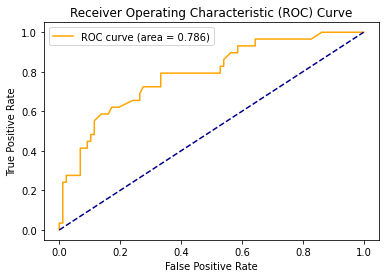

In [ ]:
plot_roc_curve(fpr, tpr)#plotting ruc curve

In [ ]:
# Putting Models in a Dictionary to make our function more dynamic

models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier(),
    "SVC":SVC(),
    "Xgboost":XGBClassifier(),
    "SGD":SGDClassifier(),
    "NB":GaussianNB(),
    "MLP":MLPClassifier(),
   

}

# Create a function to fit and score models
def fit_and_score(models, X_smote, X_test, Y_smote, y_test):
  """
  Fits and evaluate given machine learning models.
  Models: a dictionary of diccerent sklearn Machine Learnng Models
  X_train : Training data (no labeles)
  X_test : Testing data (no labels)
  y_train : Training labels
  y_test : Test labels
  """
  # Setting up Random seeds
  np.random.seed(42)
  # Make a dictionary to keep model scores
  model_scores ={}
  # Loop through models
  for name, model in models.items():
    # Fit the model to data
    model.fit(X_smote.drop(corr_features,axis=1), Y_smote)
    # Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test.drop(corr_features,axis=1),y_test)
  return model_scores

In [ ]:
%time
model_scores = fit_and_score(models=models,
                             X_smote=X_smote,
                             X_test=X_test,
                             Y_smote = Y_smote,
                             y_test = y_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


In [ ]:
model_scores

{'Logistic Regression': 0.6637931034482759,
 'KNN': 0.7413793103448276,
 'Random Forest': 0.7241379310344828,
 'SVC': 0.6810344827586207,
 'Xgboost': 0.6896551724137931,
 'SGD': 0.5689655172413793,
 'NB': 0.6293103448275862,
 'MLP': 0.6982758620689655}

In [ ]:
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=42).fit(X_smote.drop(corr_features,axis=1), Y_smote)
print('Rbf:',gpc.score( X_smote.drop(corr_features,axis=1), Y_smote))

Rbf: 0.7849002849002849


Let's visulaize the model comparision before goin any further

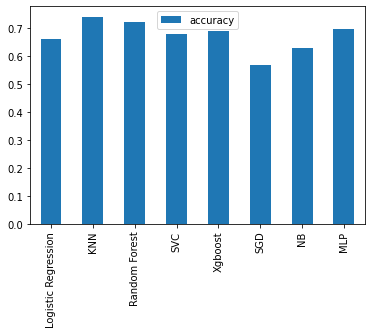

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

As we can see `XGBoost Classification`, performs best while `KNN`,`Logistic Regression`,`SVC` and `SGD Classification` and was slightly behind and `Random Forest`was perform worst.

but still, model's first predictions aren't always what we should based our next step off.

so let's do Hyperparameter Tuning

# Hyper Tuning

## Logistic Regression

In [ ]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifer
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [ ]:
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LoisticRegression
rs_log_reg.fit(X_smote.drop(corr_features,axis=1), Y_smote)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.012742749857031334}

In [ ]:
rs_log_reg.score(X_test.drop(corr_features,axis=1),y_test)

0.6982758620689655

After Tuning Logistic Regression, we got the best score as **0.69** as less than before tuning

## k Nearest Neighbor

In [ ]:
%time
# Let's Tune KNN

train_scores = []
test_scores = []

#create a list of different values of n_neighbours
neighbours = range(1,10)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neigbours
for i in neighbours:
  knn.set_params(n_neighbors = i)

  # Fit the algorithm
  knn.fit(X_smote.drop(corr_features,axis=1), Y_smote)

  # Update the training score list
  train_scores.append(knn.score(X_smote.drop(corr_features,axis=1),Y_smote))

  # Update the test score list
  test_scores.append(knn.score(X_test.drop(corr_features,axis=1), y_test))

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.54 µs


In [ ]:
train_scores

[0.9045584045584045,
 0.8262108262108262,
 0.8190883190883191,
 0.7991452991452992,
 0.7792022792022792,
 0.782051282051282,
 0.7635327635327636,
 0.7806267806267806,
 0.7678062678062678]

In [ ]:
test_scores

[0.6293103448275862,
 0.7327586206896551,
 0.6896551724137931,
 0.7586206896551724,
 0.7413793103448276,
 0.7844827586206896,
 0.7586206896551724,
 0.7844827586206896,
 0.7758620689655172]

Maximum KNN score on the test data: 0.7844827586206896


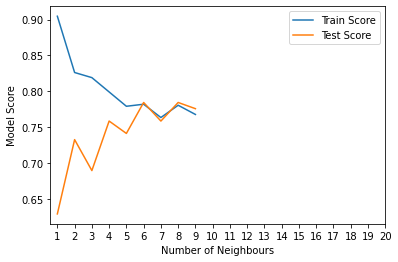

In [ ]:
plt.plot(neighbours, train_scores, label = "Train Score")
plt.plot(neighbours, test_scores, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data:",max(test_scores) )


After Tuning KNN, we got best score as **0.78** as higher than before tuning

## Stochastic Gradient Descent

In [ ]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',  
'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 

eta0 = [1, 10, 100] 

In [ ]:
param_distributions = dict(loss=loss, 
penalty=penalty, 
alpha=alpha, 
learning_rate=learning_rate, 

eta0=eta0) 

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [ ]:
np.random.seed(42)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 
random = RandomizedSearchCV(estimator=sgd, 
param_distributions=param_distributions, 
scoring='roc_auc', 
verbose=1, n_jobs=-1, 
n_iter=1000) 

In [ ]:
random_result = random.fit(X_smote.drop(corr_features,axis=1), Y_smote)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [ ]:
random_result.best_params_

{'penalty': 'l2',
 'loss': 'modified_huber',
 'learning_rate': 'optimal',
 'eta0': 10,
 'alpha': 1}

In [ ]:
np.random.seed(42)
sgd1=SGDClassifier(penalty='l2',
 loss = 'modified_huber',
 learning_rate = 'optimal',
 eta0 = 10,
 alpha = 1)

In [ ]:
sgd1.fit(X_smote.drop(corr_features,axis=1),Y_smote)

SGDClassifier(alpha=1, eta0=10, loss='modified_huber')

In [ ]:
sgd1.score(X_test.drop(corr_features,axis=1),y_test)

0.7068965517241379

After Tuned Stochastic Gradient Descent and got best score as **0.70** as **higher** than before tuning.

## Random Forest Classification

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = list(range(1,11))
min_samples_leaf = list(range(1,11))
bootstrap = [True, False] 

    
params={
  'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap
     
}


In [ ]:
np.random.seed(42)
RC1=RandomForestClassifier()

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [ ]:
RS=RandomizedSearchCV(estimator=RC1, scoring='f1',param_distributions=params, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

RS.fit(X_smote.drop(corr_features,axis=1),Y_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
 

In [ ]:
RS.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=1400)

In [ ]:
RS.best_params_ #best_params

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
np.random.seed(42)
model_RC=RandomForestClassifier(max_features='sqrt', min_samples_leaf=1,max_depth= 10,
                       min_samples_split=2, n_estimators=1400,bootstrap=True) #fit with best_params
model_RC.fit(X_smote.drop(corr_features,axis=1), Y_smote)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=1400)

In [ ]:
model_RC.score(X_test.drop(corr_features,axis=1),y_test)

0.6982758620689655

After Random Forest Classification Tuned and got best score as **0.69** as less than before tuning.

## Support Vector Classification

In [ ]:
#Hyper params
params={'C':[0.1,0.2,1,10,100,1000,10000,100000],
         'gamma':[0.1,0.01,0.001,0.0001,0.00001]}

So now rather than doing hyperparamer tuning by hand or manully let's use `GridSearchCV`

In [ ]:
#GridSearchCV

svc_grid=GridSearchCV(SVC(random_state=42),params,scoring='f1',
    n_jobs=-1,
    refit=True,
    verbose=3,                  
    cv=3)
svc_grid.fit(X_smote.drop(corr_features,axis=1), Y_smote)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
             scoring='f1', verbose=3)

In [ ]:
svc_grid.best_estimator_ 

SVC(C=10000, gamma=0.001, random_state=42)

In [ ]:
svc_grid.best_params_

{'C': 10000, 'gamma': 0.001}

In [ ]:
svc_best_params=SVC(C=1000, gamma=0.001, random_state=42,verbose=3)

In [ ]:
svc_best_params

SVC(C=1000, gamma=0.001, random_state=42, verbose=3)

In [ ]:
svc_best_params.fit(X_smote.drop(corr_features,axis=1), Y_smote)

[LibSVM]

SVC(C=1000, gamma=0.001, random_state=42, verbose=3)

In [ ]:
svc_best_params.score(X_test.drop(corr_features,axis=1),y_test)

0.7068965517241379

Afte Tuning **SVC**,we  got **0.70** as higher than before tuning.

## XGBOOST Classification

In [ ]:
params_xg={
    'gamma':[x for x in np.linspace(0,100,1000)],
    'max_depth':[int(x) for x in range(1,11)],

    'n_estimators':[int(x) for x in np.arange(1,200)],
    'learning_rate':[0.01,0.02,0.03,0.05,0.1,0.2,0.300000012,0.4,0.5]
}

In [ ]:
np.random.seed(42)
XG=XGBClassifier()

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [ ]:
Xg_RS=RandomizedSearchCV(estimator=XG, scoring='f1',param_distributions=params_xg, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

Xg_RS.fit(X_smote.drop(corr_features,axis=1), Y_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.1001001001001001,
                                                  0.2002002002002002,
                                                  0.3003003003003003,
                                                  0.4004004004004004,
                                                  0.5005005005005005,
                                                  0.6006006006006006,
                                                  0.7007007007007008,
                                                  0.8008008008008008,
                                                  0.9009009009009009,
                                                  1.001001001001001,
                                                  1.1011011011011012,
                                                  1.2012012012012012,
                                                  1.3013013013013013...
         

In [ ]:
Xg_RS.best_estimator_ #best_estimator

XGBClassifier(gamma=0.2002002002002002, learning_rate=0.300000012, max_depth=7,
              n_estimators=31)

In [ ]:
Xg_RS.best_params_ #best_params

{'n_estimators': 31,
 'max_depth': 7,
 'learning_rate': 0.300000012,
 'gamma': 0.2002002002002002}

In [ ]:
xg_boost=XGBClassifier(gamma=0.2002002002002002, learning_rate=0.300000012, max_depth=7,
              n_estimators=31, random_state=42)
xg_boost.fit(X_smote.drop(corr_features,axis=1), Y_smote) #fit

XGBClassifier(gamma=0.2002002002002002, learning_rate=0.300000012, max_depth=7,
              n_estimators=31, random_state=42)

In [ ]:
xg_boost.score(X_test.drop(corr_features,axis=1),y_test)

0.6896551724137931

After Tuned XGBPOOOST Classifier and got best score as **0.68** as same as before tunning

## Multilayer Perceptron Classification

In [ ]:
model_mlp = MLPClassifier(hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=100,
                       activation='relu',
                       random_state=42) ## model object creation max_iter=Stopping parameter
model_mlp.fit(X_smote.drop(corr_features,axis=1),Y_smote) ## training the data
y_predict_proba_mlp = model_mlp.predict_proba(X_test.drop(corr_features,axis=1)) ## predicting the pro
## bability of class
y_predict_mlp = model_mlp.predict(X_test.drop(corr_features,axis=1))
y_train_predict_mlp = model_mlp.predict(X_smote.drop(corr_features,axis=1))

In [ ]:
model_mlp.score(X_test.drop(corr_features,axis=1),y_test)

0.7586206896551724

After Tuned Multilayer Perceptron Classifier and got best score as **0.75** as higher than tunning

# Cross validation

## Logistic Regression

In [ ]:
cross_validation=cross_val_score(LogisticRegression(random_state=42),X_smote.drop(corr_features,axis=1),Y_smote,scoring='f1',cv=3)
print("Cross validation Score:",cross_validation.mean())
print("Std :",cross_validation.std())

Cross validation Score: 0.6956148768728304
Std : 0.021945923101028934


Logistic Regression **Cross validation** Score :0.69
 
Logistic Regression **Std** Score :0.02 

## K Nearest Neighbor

In [ ]:
cross_validation_KNN=cross_val_score(KNeighborsClassifier(),X_smote.drop(corr_features,axis=1),Y_smote,scoring='f1',cv=3)
print("Cross validation Score:",cross_validation_KNN.mean())
print("Std :",cross_validation_KNN.std())

Cross validation Score: 0.7123562178667405
Std : 0.028945900181336814


K Nearest Neighbor **Cross validation** Score :0.71

K Nearest Neighbor **Std** Score :0.02

## Stochastic Gradient Descent

In [ ]:
cross_validation_Sgd=cross_val_score(SGDClassifier(random_state=42),X_smote.drop(corr_features,axis=1),Y_smote,scoring='f1',cv=3)
print("Cross validation Score:",cross_validation_Sgd.mean())
print("Std :",cross_validation_Sgd.std())

Cross validation Score: 0.48814668326863453
Std : 0.29919119228377883


Stochastic Gradient Descent **Cross validation** Score :0.48
 
Stochastic Gradient Descent **Std** Score :0.29

## Random Forest Classification

In [ ]:
cross_validation_rf=cross_val_score(RandomForestClassifier(random_state=42),X_smote.drop(corr_features,axis=1),Y_smote,scoring='f1',cv=3)
print("Cross validation Score:",cross_validation_rf.mean())
print("Std :",cross_validation_rf.std())

Cross validation Score: 0.7568771230155038
Std : 0.04689623122328667


Random Forest Classification **Cross validation** Score :0.75
 
Random Forest Classification **Std** Score :0.04

## Support Vector Classifier

In [ ]:
cross_validation_svc=cross_val_score(SVC(random_state=42),X_smote.drop(corr_features,axis=1),Y_smote,scoring='f1',cv=3)
print("Cross validation Score:",cross_validation_svc.mean())
print("Std :",cross_validation_svc.std())

Cross validation Score: 0.6960084033613446
Std : 0.00699883174150367


Support Vector Classification **Cross validation** Score :0.69

Support Vector Classification **Std** Score :0.00

## XGBOOST Classification

In [ ]:
cross_validation_xgb=cross_val_score(XGBClassifier(random_state=42),X_smote.drop(corr_features,axis=1),Y_smote,scoring='f1',cv=3)
print("Cross validation Score:",cross_validation_xgb.mean())
print("Std :",cross_validation_xgb.std())

Cross validation Score: 0.7470020570067639
Std : 0.04462197755883526


XGBOOST Classification **Cross validation** Score :0.74

XGBOOSTClassification **Std** Score :0.04

## Multilayer Perceptron Classification

In [ ]:
cross_validation_mlp=cross_val_score(MLPClassifier(random_state=42),X_smote.drop(corr_features,axis=1),Y_smote,scoring='f1',cv=3)
print("Cross validation Score:",cross_validation_mlp.mean())
print("Std :",cross_validation_mlp.std())

Cross validation Score: 0.700358493909259
Std : 0.020607078411210344


Multilayer Perceptron Classification **Cross validation** Score :0.70

Multilayer Perceptron Classification  **Std** Score :0.02

## Radial Based Function

In [ ]:
cross_validation_rbf=cross_val_score(GaussianProcessClassifier(kernel=kernel,random_state=42),X_smote.drop(corr_features,axis=1),Y_smote,scoring='f1',cv=3)
print("Cross validation Score:",cross_validation_rbf.mean())
print("Std :",cross_validation_rbf.std())

Cross validation Score: 0.6905215483027501
Std : 0.0031856114902127806


Radial Based Function **Cross validation** Score :0.69

Radial Based Function **Std** Score :0.00

# Result :

<table>
  <tr>
    <th>S No</th>
    <th>Algorithm</th>
    <th>Accuracy score</th>
     <th>Cross Validation</th>
  </tr>
  <tr>
    <td>1</td>
    <td>Logistic Regression</td>
    <td>0.69</td>
    <td>0.69</td>
  </tr>
  <tr>
    <td>2</td>
    <td>K Nearest Neighbor</td>
    <td>0.78</td>
    <td>0.71</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Stochastic Gradient Descent</td>
    <td>0.70</td>
    <td>0.48</td>
  </tr>
 
  <tr>
    <td>4</td>
    <td>Random Forest Classification</td>
    <td>0.69</td>
      <td>0.75</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Support Vector Classifier</td>
    <td>0.70</td>
    <td>0.60</td>
  </tr>
  <tr>
    <td>6</td>
    <td>XGBOOST Classification</td>
    <td>0.68</td>
      <td>0.74</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Multilayer Perceptron Classification</td>
    <td>0.75</td>
    <td>0.70</td>
  </tr>
   <tr>
    <td>8</td>
    <td>Radial Based Function</td>
    <td>0.78</td>
   <td>0.69</td>
  </tr>
</table>

#**Conclusion** :
  *  From the above result table , we can conclude that **Random forest classification and XGBOOST classification** gives high accuracy of **0.75 and 0.74**.
  * Thus we conclude that our model **RandomForest Classifier** performed with an accuracy of **75%**, which is the best fit model for BloodDonationPrediction.

 